# Finding the Best Pittsburgh Neighborhood to Survive a Zombie Apocalypse

This project aims to identify the best Pittsburgh neighborhood to survive a zombie apocalypse based on proximity to hospitals and primary care access. 

## Datasets

We will use the following datasets for our analysis:

1. Pittsburgh Neighborhoods
2. Allegheny County Hospitals
3. Allegheny County Primary Care Access

## Data Analysis Process

### 1. Importing Libraries and Loading Datasets

First, we import the necessary libraries (pandas, NumPy, geopy) and load the datasets using pandas' `read_csv()` function.

### 2. Data Cleaning and Preprocessing

Before analyzing the data, we clean and preprocess it, which may include removing missing values, filtering out irrelevant columns, and extracting latitude and longitude information.

### 3. Calculating Distances to Hospitals and Primary Care Facilities

Using the `geopy.distance.great_circle()` function, we calculate the distance from each neighborhood to the nearest hospital and primary care facility.

### 4. Scoring System

We create a scoring system that assigns higher scores to neighborhoods with shorter distances to hospitals and primary care facilities.

### 5. Finding the Best Neighborhood

By sorting the neighborhoods based on their survival scores, we identify the best neighborhood for surviving a zombie apocalypse.

## Data Visualization

We use matplotlib to create the following visualizations:

1. **Bar Plot**: The top 10 neighborhoods with the highest survival scores
2. **Scatter Plot**: The neighborhoods, hospitals, and primary care facilities in Pittsburgh
3. **Heatmap**: The survival scores of Pittsburgh neighborhoods

## Conclusion

Through this analysis, we have identified the best Pittsburgh neighborhood to survive a zombie apocalypse based on proximity to hospitals and primary care access. The visualizations help us better understand the analysis results and present our findings.


Import necessary libraries:

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the datasets

In [42]:
hospitals = pd.read_csv('data-hospitallocation.csv')
primary_care = pd.read_csv('data-primary-care-access-facilities.csv')
neighborhoods = pd.read_csv('pittsburgh_neighborhoods.csv')

In [43]:
print(hospitals_data.head())
print(primary_care_data.head())
print(pittsburgh_neighborhood_data.head())

           Facility                                      Address   Latitude  \
0  UPMC Children's         4401 Penn Avenue Pittsburgh, PA 15224  40.467315   
1        UPMC Magee      300 Halkett Street Pittsburgh, PA 15213  40.436889   
2   UPMC McKeesport         1500 5th Avenue McKeesport, PA 15132  40.351343   
3        UPMC Mercy      1400 Locust Street Pittsburgh, PA 15219  40.436137   
4    UPMC Passavant  9100 Babcock Boulevard Pittsburgh, PA 15237  40.573319   

   Longitude  
0 -79.953590  
1 -79.960700  
2 -79.849457  
3 -79.985285  
4 -80.014525  
                                 GROUP_NAME              PRACTICE_ADDR_1  \
0                  Picciotti, Isabella M MD           1 Allegheny Square   
1               UPMC Emergency Medicine Inc   1 Childrens Hospital Drive   
2              Hoover Medical Associates PC             100 Delafield Rd   
3  Partners in Nephrology and Endocrinology           100 Delafield Road   
4                   Bahl and Bahl Med Assoc  100 Delafi

To check if this DataFrames are copies or views

In [69]:
hospitals = hospitals.copy()
primary_care_pittsburgh = primary_care_pittsburgh.copy()
neighborhoods = neighborhoods.copy()

Convert the Latitude and Longitude data from string to float:

In [70]:
def to_float(val):
    try:
        return float(val)
    except ValueError:
        return None

In [71]:
hospitals.loc[:, "Latitude"] = hospitals["Latitude"].apply(to_float)
hospitals.loc[:, "Longitude"] = hospitals["Longitude"].apply(to_float)
primary_care_pittsburgh.loc[:, "Latitude"] = primary_care_pittsburgh["Latitude"].apply(to_float)
primary_care_pittsburgh.loc[:, "Longitude"] = primary_care_pittsburgh["Longitude"].apply(to_float)
neighborhoods.loc[:, "intptlat10"] = neighborhoods["intptlat10"].apply(to_float)
neighborhoods.loc[:, "intptlon10"] = neighborhoods["intptlon10"].apply(to_float)

In [72]:
hospitals = hospitals.dropna(subset=["Latitude", "Longitude"])
primary_care_pittsburgh = primary_care_pittsburgh.dropna(subset=["Latitude", "Longitude"])
neighborhoods = neighborhoods.dropna(subset=["intptlat10", "intptlon10"])

Filter primary care facilities to include only those in Pittsburgh:

In [73]:
primary_care_pittsburgh = primary_care[primary_care["PRACTICE_CITY"] == "Pittsburgh"]

Create a function to calculate the distance between two coordinates:

The haversine_distance function calculates the distance between two points on Earth's surface, given their latitude and longitude coordinates. This is particularly useful for our project since we need to measure the distance between neighborhoods and healthcare facilities.

The function uses the Haversine formula, which is a mathematical equation that provides an accurate distance measurement between two points on a sphere, such as Earth. The Haversine formula takes into account the Earth's curvature to provide more precise distance calculations than simpler methods like Euclidean distance.

First convert the latitude and longitude coordinates from degrees to radians. Then, apply the Haversine formula to compute the distance between the two points. Finally, the function returns the calculated distance in kilometers.

In [74]:
import math

def haversine_distance(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371.0  # Earth's radius in kilometers

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance * 0.621371  # Convert kilometers to miles

Find the nearest hospital and primary care facility for each neighborhood:

To find the nearest facility, we loop through each facility in the DataFrame and calculate the distance from the neighborhood to the facility using the haversine_distance function. We keep track of the shortest distance we've found so far, and update it whenever we find a closer facility.

Once we've checked all the facilities, the function returns the shortest distance we found. This represents the distance to the nearest healthcare facility for the given neighborhood.

By using these two functions, we can analyze the proximity of each Pittsburgh neighborhood to healthcare facilities, which is an essential factor in determining the best neighborhoods to survive a zombie apocalypse. The closer a neighborhood is to hospitals and primary care facilities, the better its chances of survival during an emergency.

In [75]:
def find_nearest_facility(neighborhood_coord, facilities_df):
    min_distance = float("inf")
    for index, facility in facilities_df.iterrows():
        try:
            facility_coord = (float(facility["Latitude"]), float(facility["Longitude"]))
            distance = haversine_distance(neighborhood_coord, facility_coord)
            if distance < min_distance:
                min_distance = distance
        except ValueError:
            # Skip rows with invalid latitude or longitude values
            continue
    return min_distance

Reconstruc the Dataframe:

In [76]:
neighborhoods["nearest_hospital_distance"] = neighborhoods.apply(lambda row: find_nearest_facility((float(row["intptlat10"]), float(row["intptlon10"])), hospitals), axis=1)
neighborhoods["nearest_primary_care_distance"] = neighborhoods.apply(lambda row: find_nearest_facility((float(row["intptlat10"]), float(row["intptlon10"])), primary_care_pittsburgh), axis=1)


Rank the neighborhoods based on proximity to hospitals and primary care access:

To rank the neighborhoods based on their proximity to hospitals and primary care facilities, we use a combined score that takes into account the distance to the nearest hospital and the nearest primary care facility. We calculate this combined score for each neighborhood using the following formula:

**combined_score = (nearest_hospital_distance * weight1) + (nearest_primary_care_distance * weight2)**

In this formula, nearest_hospital_distance represents the distance from a neighborhood to the nearest hospital, and nearest_primary_care_distance represents the distance from the neighborhood to the nearest primary care facility. The weight1 and weight2 are adjustable weights that you can assign based on the importance you want to give to hospitals and primary care facilities, respectively. In our current analysis, we assigned equal weights of 0.5 to both components.

To calculate the combined score for each neighborhood, we first use the find_nearest_facility function to find the nearest hospital and primary care facility. We then calculate the combined score using the formula mentioned above.

After computing the combined scores for all neighborhoods, we sort the neighborhoods in ascending order based on their combined scores. A lower combined score indicates better proximity to healthcare facilities, making the neighborhood more suitable for surviving a zombie apocalypse.

Finally, we display the top 10 neighborhoods based on their combined scores, along with their distances to the nearest hospital and primary care facility. This ranking helps us identify the best neighborhoods in Pittsburgh to survive a zombie apocalypse, considering their access to healthcare facilities.

In [77]:
# Calculate a combined score (you can adjust weights as needed)
neighborhoods["combined_score"] = neighborhoods["nearest_hospital_distance"] * 0.5 + neighborhoods["nearest_primary_care_distance"] * 0.5

# Sort the neighborhoods by the combined score in ascending order (lower score is better)
sorted_neighborhoods = neighborhoods.sort_values(by="combined_score", ascending=True)

# Print the top 10 neighborhoods
print(sorted_neighborhoods[["neighbor", "nearest_hospital_distance", "nearest_primary_care_distance", "combined_score"]].head(10))


    neighbor  nearest_hospital_distance  nearest_primary_care_distance  \
77        62                   0.172401                       0.051301   
21         5                   0.299891                       0.097913   
45        46                   0.384916                       0.034742   
52        27                   0.310163                       0.156548   
22        67                   0.274046                       0.193064   
46        63                   0.275910                       0.200994   
61        57                   0.359312                       0.119030   
2         18                   0.429851                       0.056996   
44        39                   0.319566                       0.167728   
43        58                   0.375601                       0.179635   

    combined_score  
77        0.111851  
21        0.198902  
45        0.209829  
52        0.233355  
22        0.233555  
46        0.238452  
61        0.239171  
2         0.24342

In [78]:
# Print the top 10 neighborhoods with their names
print(sorted_neighborhoods[["hood", "nearest_hospital_distance", "nearest_primary_care_distance", "combined_score"]].head(10))

                         hood  nearest_hospital_distance  \
77               West Oakland                   0.172401   
21   Lincoln-Lemington-Belmar                   0.299891   
45           Allegheny Center                   0.384916   
52                 Bloomfield                   0.310163   
22                      Bluff                   0.274046   
46            Central Oakland                   0.275910   
61           Crawford-Roberts                   0.359312   
2                    Garfield                   0.429851   
44             East Allegheny                   0.319566   
43  Central Business District                   0.375601   

    nearest_primary_care_distance  combined_score  
77                       0.051301        0.111851  
21                       0.097913        0.198902  
45                       0.034742        0.209829  
52                       0.156548        0.233355  
22                       0.193064        0.233555  
46                       0.

1. **Bar Plot**: The top 10 neighborhoods with the highest survival scores

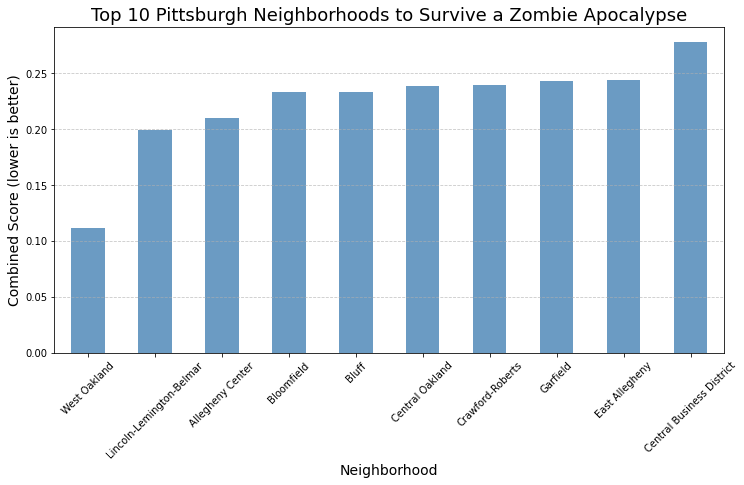

In [79]:
# Extract the top 10 neighborhoods
top_neighborhoods = sorted_neighborhoods.head(10)

# Set the index of the DataFrame to the 'hood' column to use neighborhood names as labels
top_neighborhoods = top_neighborhoods.set_index("hood")

# Plot the combined scores for the top 10 neighborhoods
ax = top_neighborhoods["combined_score"].plot(kind='bar', figsize=(12, 6), color='steelblue', alpha=0.8)

# Set the title and labels
ax.set_title("Top 10 Pittsburgh Neighborhoods to Survive a Zombie Apocalypse", fontsize=18)
ax.set_xlabel("Neighborhood", fontsize=14)
ax.set_ylabel("Combined Score (lower is better)", fontsize=14)

# Customize the ticks
ax.tick_params(axis="x", labelsize=10, rotation=45)

# Add the grid
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()